# What is the network learning?

* We can gain some intuition in what the network is learning
* Especially fruitful will turn out to look at the weights of the hidden layer



In [7]:
import json
import pickle
from keras.models import Model, model_from_json


def load_model(model_name):

    with open(model_name+".model.json", "rt") as f:
        model=model_from_json(f.read())
    model.load_weights(model_name+".weights.h5")
    
    with open(model_name+".encoders.pickle","rb") as f:
        label_encoder,vectorizer=pickle.load(f)
    
    return model,label_encoder,vectorizer

model,label_encoder,vectorizer=load_model("models/imdb_bow")
print(model)

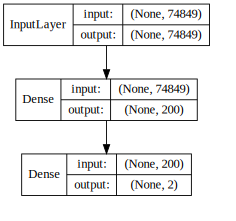

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,dpi=65).create(prog='dot', format='svg'))


* This is our model (watch out, Keras plots models from top to bottom)
* Hidden layer has N nodes with 74849 inputs each, one input for one word in the vocabulary
* We can also look at it the other way around: each word is assigned one weight for each hidden layer node
* So each word is seen by the network as a N-dimensional vector
* But what are these vectors? What properties should they have? Let us find out!

In [11]:
learned_weights=model.layers[1].get_weights()[0]
learned_weights.shape

(74849, 200)

* A good and easy way to explore the vectors is through their neighborhood
* This is easy to implement so let's try

In [12]:
import numpy

def nearest(word,learned_weights,vectorizer):
    inverse_vocab=dict((v,k) for k,v in vectorizer.vocabulary_.items())
    word_idx=vectorizer.vocabulary_[word]
    word_vector=learned_weights[word_idx]
    x=numpy.linalg.norm(word_vector-learned_weights,axis=-1)
    nearest=numpy.argsort(x)
    for idx in nearest[:30]:
        print(inverse_vocab[idx], end=", ")
    print()
    
nearest("bad",learned_weights,vectorizer)
nearest("terrible",learned_weights,vectorizer)

nearest("great",learned_weights,vectorizer)
nearest("enjoyable",learned_weights,vectorizer)


bad, mst3k, stinker, fest, baldwin, embarrassing, lousy, mushrooms, knockoff, unconvincing, save, degenerate, unlikeable, horrid, avoid, nisha, kothari, poor, recycling, lifeless, mess, dreadful, disjointed, squandered, signal, cohesion, monotonous, wooden, horrible, incoherent, 
terrible, tubes, fest, ridiculous, overacts, qualified, alright, fails, hackers, signal, miscast, unwatchable, disjointed, squandered, mess, massacres, appalling, mst3k, boredom, horrible, paycheck, stinker, cardboard, tiresome, kareena, embarrassing, programming, knockoff, horrid, mushrooms, 
great, preferring, awe, mcintire, wonderful, loved, appreciated, excellently, fantastic, amazing, boothe, perfect, surprisingly, superb, antwone, glee, judson, intricately, natures, sumpter, quintessential, heavenly, infernal, superbly, moodiness, riff, admiration, enjoyable, flawless, mccartney, 
enjoyable, loved, flawless, awe, superb, great, quintessential, perfect, natures, amazing, fantastic, today, mcintire, antwon